## One-class SVM 

One-class SVM is abbreviation of one-class support vector machines. It is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set (sklearn documentation). It basically means that this algorithm is trained only on the ‘normal’ data. It learns the boundaries of these normal points and is therefore able to classify any points that lie outside the boundary as, which in another name, outliers.

You can take a look at the parameters of the model down below, for more information regarding the model, please check out the [OneClassSVM documentation](
https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM
):

#### Explanation of important parameters:

- `kernel`: specifies the kernel type to be used in the algorithm.
- `nu` :the proportion of outliers you expect to observe 
- `gamma`: determines the smoothing of the contour lines.

### One-class SVM Exercises

**TO DO**: import OneClassSVM from sklearn.svm, make_blobs, numpy, and plt from matplotlib

In [1]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt


We have created a random sample dataset below by using the `make_blobs()` function.

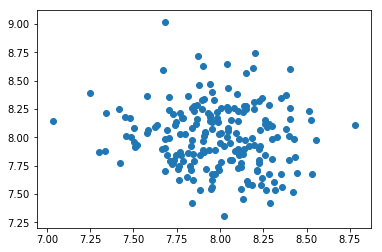

In [2]:
random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))

plt.scatter(x[:,0], x[:,1])
plt.show()


**TO DO:** We will use the rbf kernel type for our model, please set the kernel type to rbf, which stands for [`radial basis function`](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)

In [3]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.03, random_state=None, shrinking=True, tol=0.001,
      verbose=False)


**TO DO:** Please fit the model with the dataset `x` that we created at the beginning and get the prediction data by using the fit() and predict() method.

In [4]:
svm.fit(x)
pred = svm.predict(x)

**TO DO:** If everything is done correctly before, please extract the negative outputs (where the prediction of the data is equal to -1) as the outliers.

In [5]:
anom_index = where(pred == -1)
values = x[anom_index]

Now we will visualize what we have done by using plt.

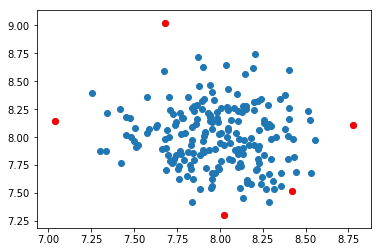

In [6]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## Local Outlier Factor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods. 

Local Outlier Factor (LOF) is a score that describes how likely a certain data point is an outlier/anomaly.

- When LOF is around 1, it is most likely that the data point is normal.
- When LOF scores over 1, it is most likely that the data point is an outlier.

In general, the LOF of a point tells the density of this point compared to the density of its neighbors. If the density of a point is much smaller than the densities of its neighbors (LOF ≫1), the point is far from dense areas and, hence, an outlier.

#### Explanation of important parameters
- `n_neighbors`: the number of neighbors considered
    - it should be greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster
    - and smaller than the maximum number of close by samples that can potentially be local outliers. 
    - In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.
- `contamination`: the amount of contamination of the data set, i.e. the proportion of outliers in the data set. When fitting this is used to define the threshold on the scores of the samples.

#### Explanation of attributes
- `negative_outlier_factor_`: the opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score. The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.
- `n_neighbors_`:the actual number of neighbors used for kneighbors queries.
- `offset_`: offset used to obtain binary labels from the raw scores. Observations having a `negative_outlier_factor` smaller than `offset_` are detected as **abnormal**. 

See more information here: [LocalOutlierFactor Documentation](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#:~:text=The%20Local%20Outlier%20Factor%20)

### Local outlier factor exercises

Firstly, we will important all necessary packages.

In [7]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

We have created a random sample dataset below again by using the `make_blobs()` function.

In [8]:
random.seed(1)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

**TO DO:** please visualize the dataset in a plot

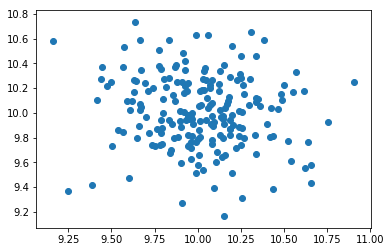

In [9]:
plt.scatter(x[:,0], x[:,1])
plt.show()

**TO DO:** we will then construct a LocalOutlierFactor model with n_neighbors set to 20 and contamination set to 0.03.

In [10]:
model = LocalOutlierFactor(n_neighbors=20, contamination=.03)


**TO DO:** please fit the dataset that we generated in the beginning to the model and make prediction using the `fit_predict()` method.

In [11]:
y_pred = model.fit_predict(x)

**TO DO:** please output the negative_outlier_factor_ from the model

In [12]:
lof = model.negative_outlier_factor_

print(lof)

[-1.120606   -1.14437502 -0.99761787 -0.9941928  -1.31099752 -1.53859625
 -1.00406782 -1.24131522 -1.02656272 -1.03895608 -0.98068138 -1.51716114
 -1.0986004  -0.96976527 -0.99681183 -2.10995972 -0.990004   -1.12563559
 -0.98989089 -1.17292571 -1.29835171 -1.06911188 -1.11539664 -1.24947982
 -1.06220226 -1.05388469 -0.95570855 -1.04979114 -0.97850653 -1.31895222
 -0.98508492 -1.02020752 -1.34179377 -0.98711207 -1.05601573 -1.11017117
 -0.98090169 -1.08393311 -1.10587828 -0.98820498 -1.05107291 -1.16466334
 -1.09608812 -0.95578131 -1.03617146 -1.7089345  -1.071127   -2.01755187
 -0.98726336 -0.98854588 -1.00793811 -0.98753404 -1.10186464 -1.19970701
 -1.16704079 -1.3786222  -1.4378395  -1.33413937 -0.95541535 -1.13472903
 -1.08859912 -1.01056098 -1.27781974 -0.97305452 -1.06819691 -1.01166087
 -0.98291307 -0.98960872 -1.36164516 -1.21503289 -0.99626468 -1.69406001
 -0.98616592 -1.17946784 -0.98444323 -1.00523465 -0.97590888 -1.81599142
 -1.92122078 -1.07908621 -0.9835043  -1.09021268 -1

**TO DO:** find out the number of neighbors used for kneighbors queries in the model for practice

**TO DO**: please assign the attribute `offset_` from the model to a variable called `threshold`

In [13]:
threshold = quantile(lof, .03)
print(threshold)

-1.8191482960907037


There are two ways that we can find out the outliers.
1. using the fit_predict() method and extract negative outputs as the outliers
2. obtain the threshold value and extract the anomalies by comparing the threshold value and identify the values of elements

#### Mehod 1
**TO DO:** please extract the negative outputs as the outliers

In [14]:
lofs_index=where(y_pred==-1)
values_1 = x[lofs_index]

values_1

array([[ 9.1620745 , 10.58125864],
       [10.90925713, 10.24737539],
       [ 9.90696497,  9.26954867],
       [ 9.2480678 ,  9.36575082],
       [ 9.38883963,  9.41722325],
       [10.15452208,  9.16523966]])

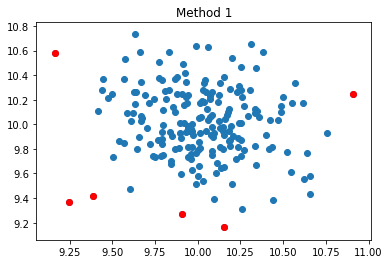

In [15]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values_1[:,0],values_1[:,1], color='r')
plt.title ("Method 1")
plt.show()

#### Method 2
**TO DO:** extract the anomalies by comparing the threshold value, when the threshold value bigger or equal to the local outlier factor score

In [18]:
index = where(lof<=threshold)
values_2 = x[index]

If everything is done correctly before, we can visualize the outliers in the plot below.

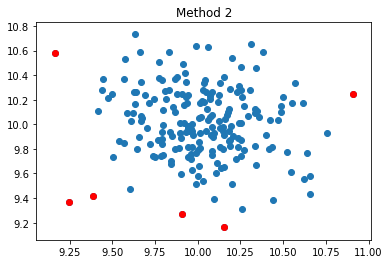

In [19]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values_2[:,0],values_2[:,1], color='r')
plt.title ("Method 2")
plt.show()